In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Load the data
df = pd.read_csv('qwerty.csv')

In [25]:
# Label the reviews based on star ratings
def label_sentiment(rating):
    if rating in [1, 2]:
        return 'negative'
    elif rating == 3:
        return 'neutral'
    else:
        return 'positive'

In [26]:
df['Sentiment'] = df['Rating'].apply(label_sentiment)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Processed_Review'], df['Sentiment'], test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = TfidfVectorizer(max_features=50000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [27]:
# Train the Logistic Regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=10000)

In [28]:
# Predict sentiments
y_pred = model.predict(X_test_tfidf)

In [29]:
# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

    negative       0.96      1.00      0.98      2067
     neutral       0.00      0.00      0.00         7
    positive       1.00      0.32      0.49       115

    accuracy                           0.96      2189
   macro avg       0.65      0.44      0.49      2189
weighted avg       0.96      0.96      0.95      2189

Accuracy: 0.9611694837825491


C:\Users\krish\anaconda3\envs\nlp_env\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\krish\anaconda3\envs\nlp_env\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\krish\anaconda3\envs\nlp_env\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


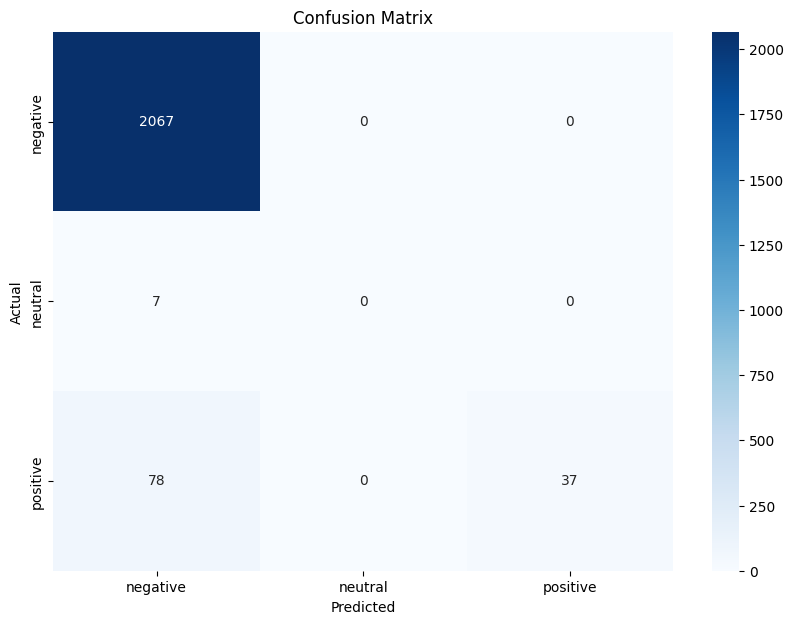

In [12]:
# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=['negative', 'neutral', 'positive'])
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the data
df = pd.read_csv('qwerty.csv')

# Preprocess the data
df['Review'] = df['Review'].astype(str)
df['Sentiment'] = df['Rating'].apply(lambda x: 'positive' if x >= 4 else ('negative' if x <= 2 else 'neutral'))

# Encode the sentiments to numeric values
sentiment_label = {'negative': 0, 'neutral': 1, 'positive': 2}
df['Sentiment'] = df['Sentiment'].map(sentiment_label)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(df['Review'], df['Sentiment'], test_size=0.2, random_state=42)


In [2]:
# Tokenize the text
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)

# Pad the sequences
max_length = 100
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post', truncating='post')
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding='post', truncating='post')


In [4]:
# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 16),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [5]:
# Train the model
history = model.fit(train_padded, y_train, epochs=10, validation_data=(test_padded, y_test), verbose=2)


Epoch 1/10
274/274 - 2s - 7ms/step - accuracy: 0.9465 - loss: 0.3053 - val_accuracy: 0.9443 - val_loss: 0.2122
Epoch 2/10
274/274 - 1s - 2ms/step - accuracy: 0.9497 - loss: 0.1977 - val_accuracy: 0.9443 - val_loss: 0.2005
Epoch 3/10
274/274 - 0s - 2ms/step - accuracy: 0.9497 - loss: 0.1861 - val_accuracy: 0.9443 - val_loss: 0.1868
Epoch 4/10
274/274 - 0s - 2ms/step - accuracy: 0.9497 - loss: 0.1704 - val_accuracy: 0.9443 - val_loss: 0.1708
Epoch 5/10
274/274 - 0s - 2ms/step - accuracy: 0.9505 - loss: 0.1443 - val_accuracy: 0.9447 - val_loss: 0.1433
Epoch 6/10
274/274 - 0s - 2ms/step - accuracy: 0.9608 - loss: 0.1136 - val_accuracy: 0.9529 - val_loss: 0.1236
Epoch 7/10
274/274 - 0s - 2ms/step - accuracy: 0.9742 - loss: 0.0884 - val_accuracy: 0.9657 - val_loss: 0.1033
Epoch 8/10
274/274 - 0s - 2ms/step - accuracy: 0.9781 - loss: 0.0762 - val_accuracy: 0.9612 - val_loss: 0.1040
Epoch 9/10
274/274 - 0s - 2ms/step - accuracy: 0.9829 - loss: 0.0624 - val_accuracy: 0.9712 - val_loss: 0.0945
E

In [6]:
# Evaluate the model
loss, accuracy = model.evaluate(test_padded, y_test)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

# Make predictions
predictions = model.predict(test_padded)
predicted_classes = np.argmax(predictions, axis=1)

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_classes, target_names=['negative', 'neutral', 'positive']))


69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9724 - loss: 0.0886
Loss: 0.09344238042831421
Accuracy: 0.9725902080535889
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
              precision    recall  f1-score   support

    negative       0.98      1.00      0.99      2067
     neutral       0.00      0.00      0.00         7
    positive       0.89      0.61      0.72       115

    accuracy                           0.97      2189
   macro avg       0.62      0.53      0.57      2189
weighted avg       0.97      0.97      0.97      2189



C:\Users\krish\anaconda3\envs\nlp_env\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\krish\anaconda3\envs\nlp_env\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\krish\anaconda3\envs\nlp_env\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


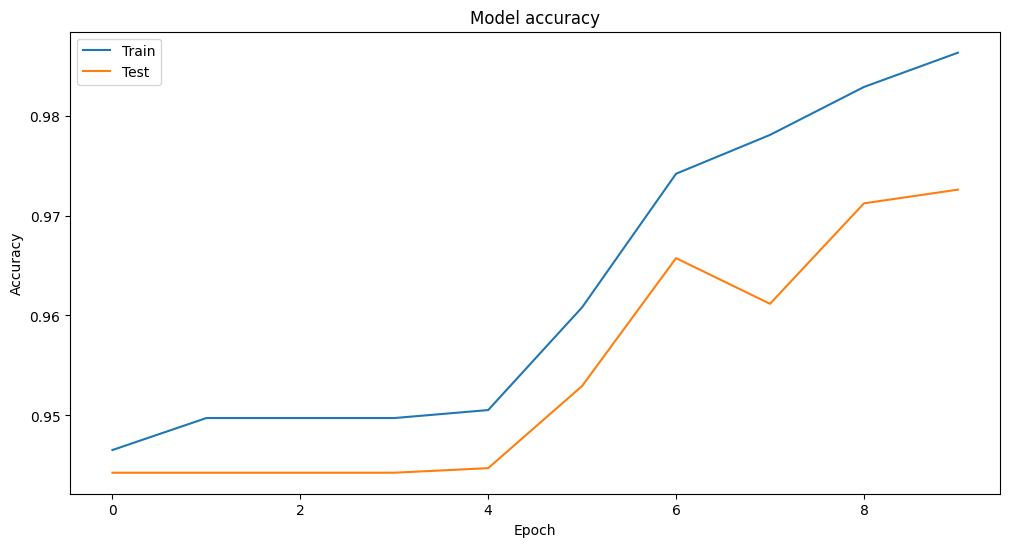

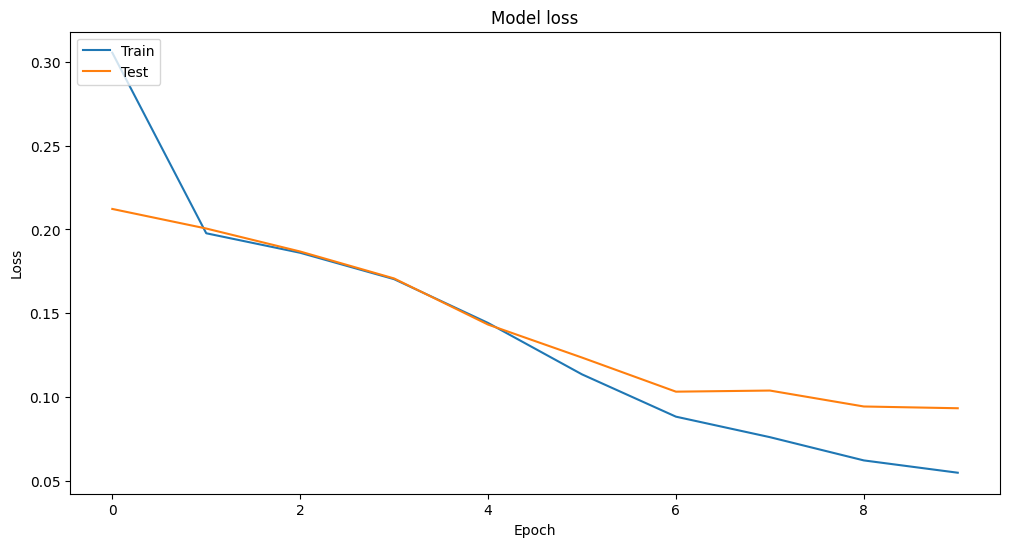

Model saved as sentiment_analysis_model.h5


In [7]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# Save the model
model.save('sentiment_analysis_model.h5')
print('Model saved as sentiment_analysis_model.h5')


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the data
df = pd.read_csv('qwerty.csv')

# Preprocess the data
df['Review'] = df['Review'].astype(str)
df['Sentiment'] = df['Rating'].apply(lambda x: 'positive' if x >= 4 else ('negative' if x <= 2 else 'neutral'))

# Encode the sentiments to numeric values
sentiment_label = {'negative': 0, 'neutral': 1, 'positive': 2}
df['Sentiment'] = df['Sentiment'].map(sentiment_label)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(df['Review'], df['Sentiment'], test_size=0.2, random_state=42)


In [9]:
# Tokenize the text
tokenizer = Tokenizer(num_words=20000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)

# Pad the sequences
max_length = 200
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post', truncating='post')
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding='post', truncating='post')


In [12]:
# Load GloVe embeddings
embeddings_index = {}
with open('glove.6B.100d.txt', 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

# Create embedding matrix
embedding_dim = 100
word_index = tokenizer.word_index
embedding_matrix = np.zeros((20000, embedding_dim))
for word, i in word_index.items():
    if i < 20000:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, GlobalAveragePooling1D

# Build the model
model = Sequential([
    Embedding(20000, embedding_dim, weights=[embedding_matrix], trainable=False),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.5),
    Bidirectional(LSTM(32)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [15]:
# Train the model
history = model.fit(train_padded, y_train, epochs=10, batch_size=64, validation_data=(test_padded, y_test), verbose=2)


Epoch 1/10
137/137 - 30s - 222ms/step - accuracy: 0.9414 - loss: 0.2929 - val_accuracy: 0.9443 - val_loss: 0.2253
Epoch 2/10
137/137 - 23s - 168ms/step - accuracy: 0.9497 - loss: 0.2245 - val_accuracy: 0.9443 - val_loss: 0.2185
Epoch 3/10
137/137 - 23s - 171ms/step - accuracy: 0.9515 - loss: 0.1822 - val_accuracy: 0.9621 - val_loss: 0.1323
Epoch 4/10
137/137 - 23s - 169ms/step - accuracy: 0.9559 - loss: 0.1658 - val_accuracy: 0.9667 - val_loss: 0.1301
Epoch 5/10
137/137 - 24s - 176ms/step - accuracy: 0.9686 - loss: 0.1326 - val_accuracy: 0.9680 - val_loss: 0.1023
Epoch 6/10
137/137 - 29s - 208ms/step - accuracy: 0.9648 - loss: 0.1295 - val_accuracy: 0.9671 - val_loss: 0.1014
Epoch 7/10
137/137 - 28s - 207ms/step - accuracy: 0.9724 - loss: 0.1192 - val_accuracy: 0.9740 - val_loss: 0.0926
Epoch 8/10
137/137 - 26s - 193ms/step - accuracy: 0.9704 - loss: 0.1203 - val_accuracy: 0.9653 - val_loss: 0.1345
Epoch 9/10
137/137 - 26s - 192ms/step - accuracy: 0.9764 - loss: 0.1029 - val_accuracy: 

In [16]:
# Evaluate the model
loss, accuracy = model.evaluate(test_padded, y_test)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

# Make predictions
predictions = model.predict(test_padded)
predicted_classes = np.argmax(predictions, axis=1)

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_classes, target_names=['negative', 'neutral', 'positive']))


69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.9793 - loss: 0.0739
Loss: 0.08658240735530853
Accuracy: 0.97533118724823
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step
              precision    recall  f1-score   support

    negative       0.98      1.00      0.99      2067
     neutral       0.00      0.00      0.00         7
    positive       0.91      0.65      0.76       115

    accuracy                           0.98      2189
   macro avg       0.63      0.55      0.58      2189
weighted avg       0.97      0.98      0.97      2189



C:\Users\krish\anaconda3\envs\nlp_env\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\krish\anaconda3\envs\nlp_env\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\krish\anaconda3\envs\nlp_env\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


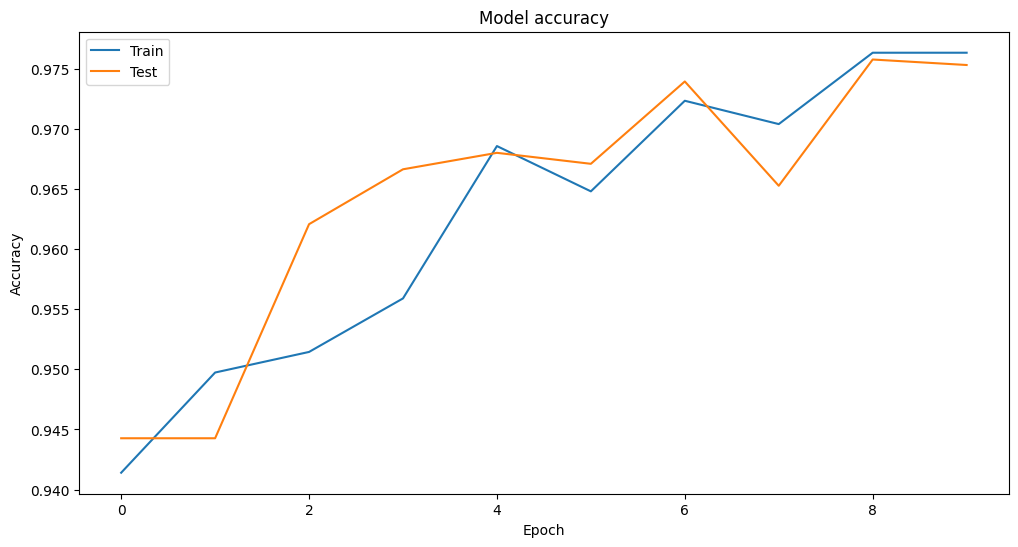

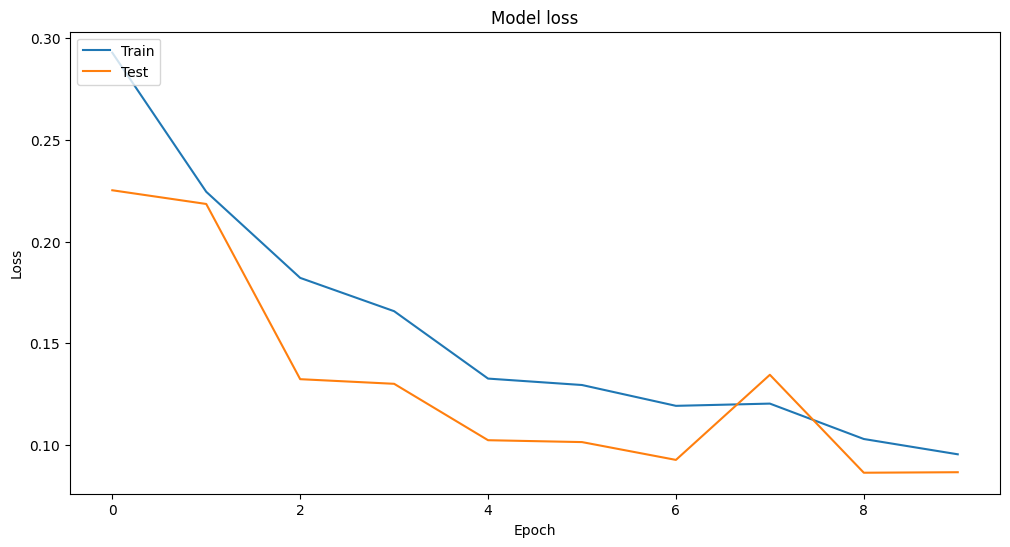

Model saved as sentiment_analysis_model_improved.h5


In [17]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# Save the model
model.save('sentiment_analysis_model_improved.h5')
print('Model saved as sentiment_analysis_model_improved.h5')
